# Air Quality Index Prediction
This project aims to develop a predictive model for estimating air quality index (AQI) based on various environmental factors.

## Importing Required Libraries
We start by importing essential libraries for data manipulation, visualization, and model training.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading and Exploring the Dataset
We load the dataset and perform initial exploration to understand its structure and characteristics.

In [ ]:
# Load Dataset
file_path = "city_day.csv"  #https://www.kaggle.com/code/anjusunilkumar/air-quality-index-prediction?select=city_day.csv
df = pd.read_csv(file_path)

In [ ]:
#Display Dataset
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## Data Preprocessing
This step involves handling missing values, encoding categorical features, and normalizing numerical features.

In [ ]:
# Che+ck the total null values
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
# Handling missing values
# Drop rows where AQI is missing, as it's our target variable
df = df.dropna(subset=['AQI'])

## Exploratory Data Analysis (EDA)
We visualize the data to identify patterns, correlations, and important features.

In [ ]:
# Fill missing values only in numeric columns with their respective column means
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

<ipython-input-7-0152cac2649a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


In [ ]:
# Drop non-numeric and irrelevant columns
drop_columns = ['City', 'Date', 'AQI_Bucket']  # 'City' and 'Date' are categorical, 'AQI_Bucket' is redundant
df = df.drop(columns=drop_columns)

In [ ]:
# Define target (dependent variable) and features (independent variables)
target = 'AQI'
features = [col for col in df.columns if col != target]  # All columns except AQI

X = df[features]  # Features dataset
y = df[target]  # Target variable

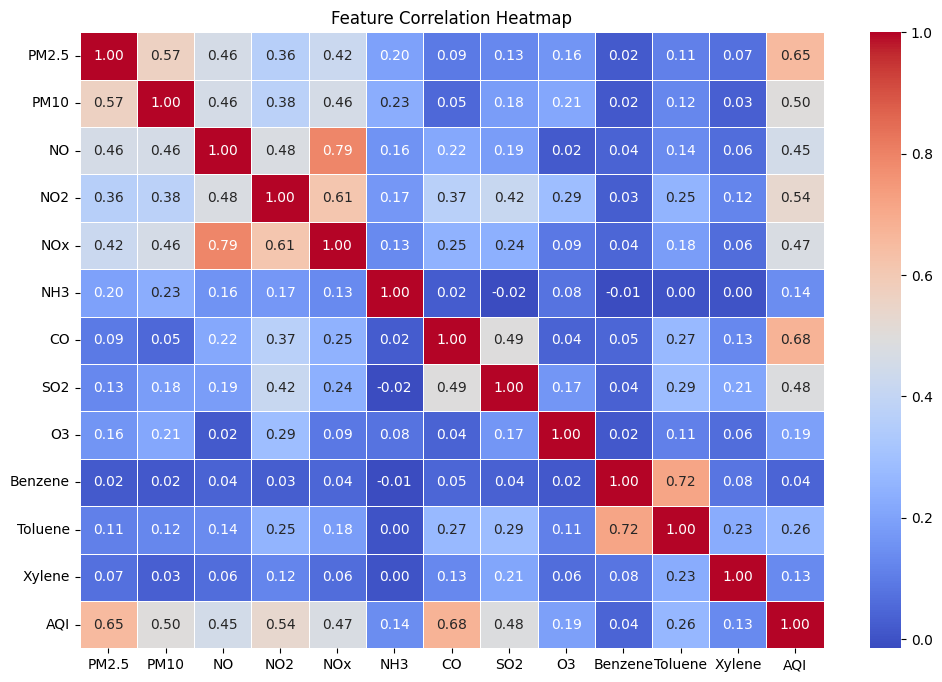

In [ ]:
# Select only numerical columns for correlation
num_df = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Compute correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Splitting Data into Training and Testing Sets
We divide the dataset into training and test sets to evaluate model performance.

In [ ]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [ ]:
# Feature Scaling
# Standardize the dataset to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Choosing, Training and Evaluating the Models
We train multiple machine learning models and compare their performance.

In [ ]:
# Initialize and define models to be tested
models = {
    "Linear Regression": LinearRegression(),  # Simple baseline model
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),  # Handles non-linearity well
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # Gradient boosting for performance
}

In [ ]:
# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model on scaled data
    y_pred = model.predict(X_test_scaled)  # Predict on test set
    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}  # Store results
    print(f"{name} Performance:\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}\n")

Linear Regression Performance:
MAE: 31.20, RMSE: 59.11, R2 Score: 0.81

Random Forest Performance:
MAE: 20.59, RMSE: 40.48, R2 Score: 0.91

XGBoost Performance:
MAE: 21.84, RMSE: 42.38, R2 Score: 0.90



In [ ]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                         MAE       RMSE  R2 Score
Linear Regression  31.203327  59.108362  0.809197
Random Forest      20.591788  40.480720  0.910508
XGBoost            21.835663  42.384466  0.901893


## Model Performance Comparison

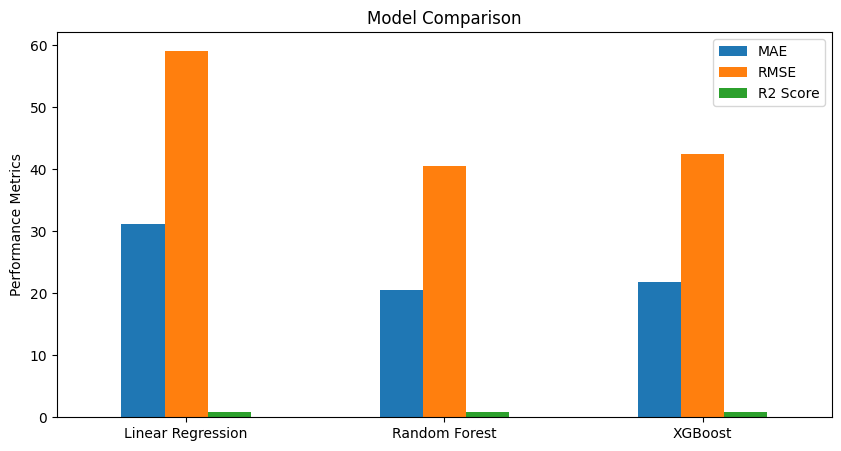

In [ ]:
import matplotlib.pyplot as plt

# Plot model performance
results_df.plot(kind='bar', figsize=(10, 5))
plt.title("Model Comparison")
plt.ylabel("Performance Metrics")
plt.xticks(rotation=0)
plt.show()

## Feature Importance Analysis

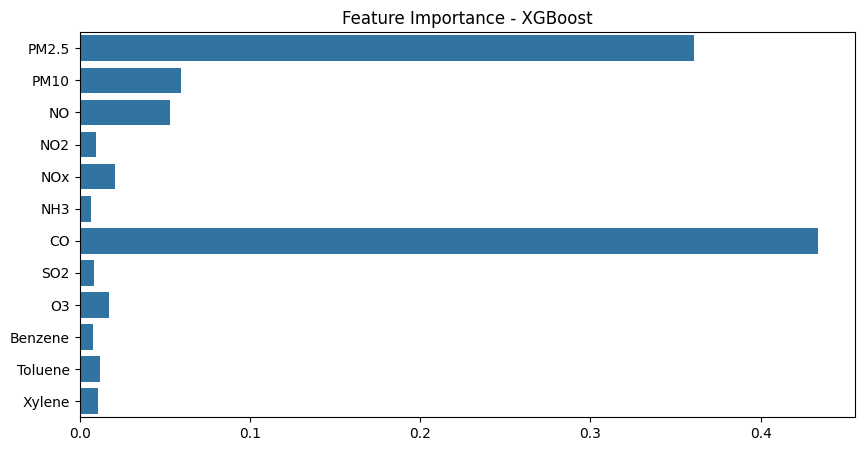

In [ ]:
# Feature Importance Plot (For XGBoost)
feature_importance = models["XGBoost"].feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance - XGBoost")
plt.show()

## Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning for XGBoost
# Define parameter grid for tuning
tuning_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), tuning_params, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
print(f"Best XGBoost Parameters: {grid_search.best_params_}")  # Output the best parameters

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


## Saving the best model

In [ ]:
# Save the best model
import joblib
joblib.dump(models["XGBoost"], "best_aqi_model.pkl")

['best_aqi_model.pkl']

## Downloading the Saved Model

In [ ]:
from google.colab import files
files.download("best_aqi_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Optimized Model Training and Evaluation

In [ ]:
# Train the best XGBoost model with optimized parameters
best_xgb = XGBRegressor(objective='reg:squarederror',
                        learning_rate=0.2,
                        max_depth=5,
                        n_estimators=100,
                        random_state=42)

best_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Evaluate the optimized model
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print(f"Optimized XGBoost Performance:\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")

# Save the optimized model
import joblib
joblib.dump(best_xgb, "optimized_xgb_model.pkl")

Optimized XGBoost Performance:
MAE: 21.45, RMSE: 42.62, R2 Score: 0.90


['optimized_xgb_model.pkl']



## Making Predictions with the Trained Model

In [ ]:
new_data = X_test_scaled[:5]  # Use the first 5 test samples as an example
predictions = best_xgb.predict(new_data)
print("Predicted AQI values:", predictions)

Predicted AQI values: [103.40796 210.93788 100.8787  125.83341  73.10772]


## Saving Predictions to a File

In [ ]:
pred_df = pd.DataFrame({'Predicted_AQI': predictions})
pred_df.to_csv("aqi_predictions.csv", index=False)
print("Predictions saved to aqi_predictions.csv")

Predictions saved to aqi_predictions.csv


## Actual vs. Predicted AQI Visualization

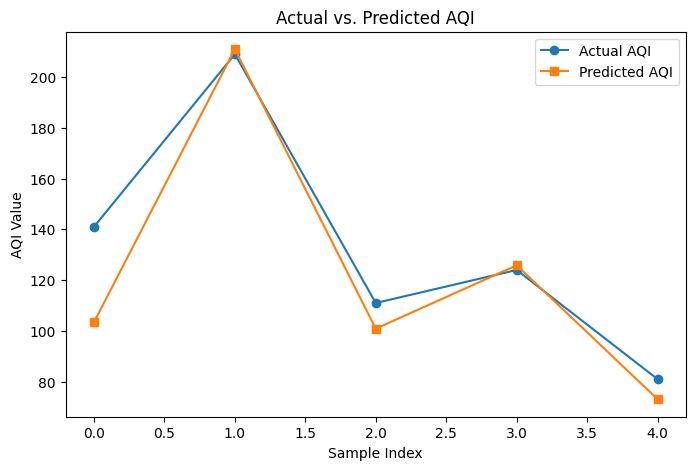

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(y_test[:5].values, label="Actual AQI", marker='o')
plt.plot(predictions, label="Predicted AQI", marker='s')
plt.xlabel("Sample Index")
plt.ylabel("AQI Value")
plt.title("Actual vs. Predicted AQI")
plt.legend()
plt.show()